In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

In [91]:
#Func gives real and imag of FFT provide dataframe in Time Domain
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

In [92]:
def idft2(yr, yi):
    N, x = yr.shape[0], []
    yr = dict(yr.values)
    yi = dict(yi.values)
    for t in range(N):
        real = 0
        for (k,v),(k2,v2) in zip(yr.items(),yi.items()):
            theta1 = t * (2 * math.pi) * k
            theta2 = t * (2 * math.pi) * k2
            real += (v * math.cos(theta1)) - (v2 * math.sin(theta2))
        x.append(real/N)
    return x

In [93]:
def log_freq(df1, df2):
    df1['Ampli'] = np.log(df1["Ampli"])
    df1['Ampli'] = df1['Ampli'].replace([np.inf, -np.inf], 0)
    df1 = df1.fillna(0)
    df2['Ampli'] = np.log(df2["Ampli"])
    df2['Ampli'] = df2['Ampli'].replace([np.inf, -np.inf], 0)
    df2 = df2.fillna(0)
    return df1, df2

In [94]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [95]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Phase'])
    return fft_data1

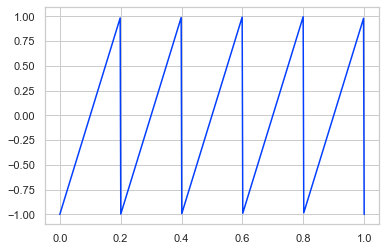

In [96]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500)
s = signal.sawtooth(2 * np.pi * 5 * t)
plt.plot(t, s)

In [97]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_1

,Time,Value
0,0.000000,-1.00000
1,0.002004,-0.97996
2,0.004008,-0.95992
3,0.006012,-0.93988
4,0.008016,-0.91984
...,...,...
495,0.991984,0.91984
496,0.993988,0.93988
497,0.995992,0.95992
498,0.997996,0.97996


## Freq on Real and Imag

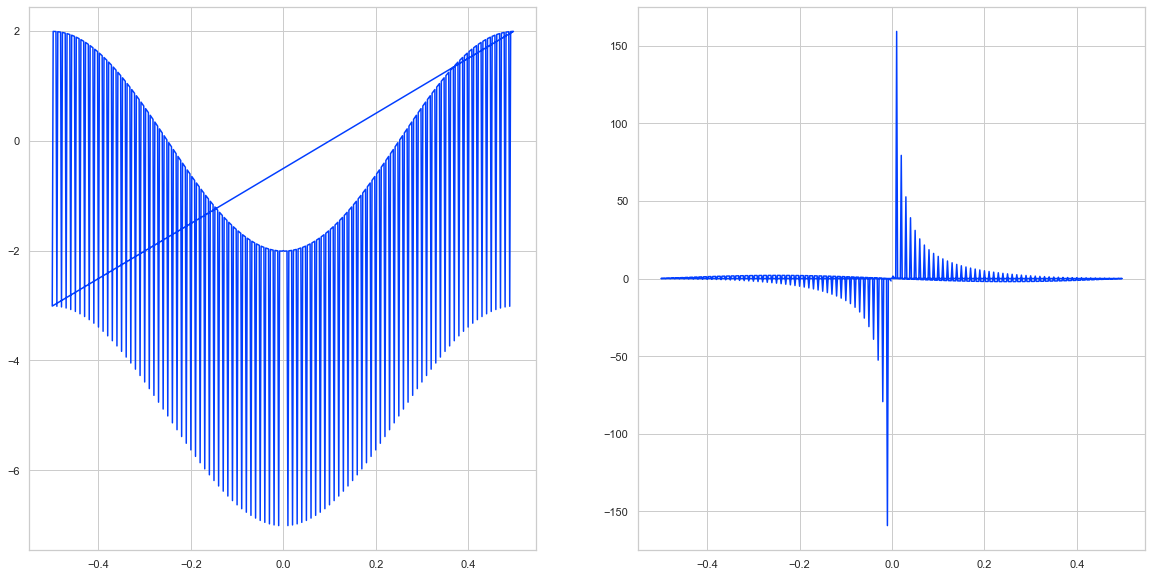

In [100]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].plot(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[1].plot(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])

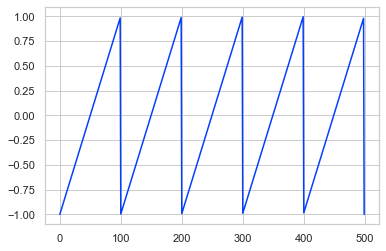

In [101]:
value = idft2(freq_ampli1,freq_ampli1i)
plt.plot(value)

In [102]:
distance.euclidean(signal_1["Value"],value)

1.1912477914836944e-13

## Log Freq

In [103]:
log1, log1i = log_freq(freq_ampli1, freq_ampli1i)

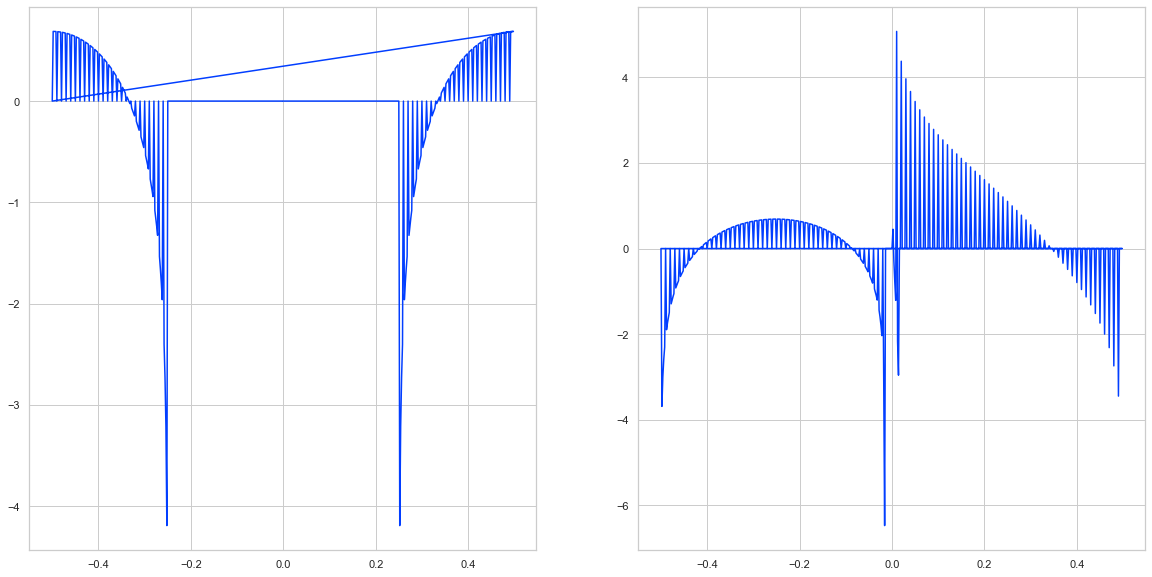

In [104]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].plot(log1['Freq'], log1['Ampli'])
axs[1].plot(log1i['Freq'], log1i['Ampli'])

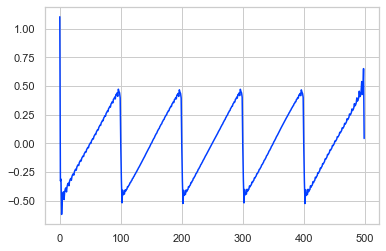

In [105]:
log1["Ampli"] = np.exp(log1["Ampli"])
log1i["Ampli"] = np.exp(log1i["Ampli"])
value = idft2(log1,log1i)
plt.plot(value)

In [106]:
distance.euclidean(signal_1["Value"],value)

7.1950134545526225

## Cepstrum

In [107]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps, _ = complex_cepstrum(signal_1['Value'])
print(ceps)

[ 9.56150462e-01 -1.60680289e+00 -6.69500650e-03 -5.40341073e-01
 -6.68761876e-03 -3.27210264e-01 -6.67723639e-03 -2.35982206e-01
 -6.66374563e-03 -1.85387366e-01 -6.64702168e-03 -1.53261549e-01
 -6.62692753e-03 -1.31080256e-01 -6.60331258e-03 -1.14865558e-01
 -6.57601103e-03 -1.02511645e-01 -6.54484013e-03 -9.27995108e-02
 -6.50959813e-03 -8.49746691e-02 -6.47006182e-03 -7.85451990e-02
 -6.42598388e-03 -7.31767280e-02 -6.37708959e-03 -6.86340915e-02
 -6.32307315e-03 -6.47471359e-02 -6.26359331e-03 -6.13897610e-02
 -6.19826821e-03 -5.84665868e-02 -6.12666934e-03 -5.59041936e-02
 -6.04831430e-03 -5.36452078e-02 -5.96265825e-03 -5.16442105e-02
 -5.86908360e-03 -4.98648493e-02 -5.76688752e-03 -4.82777606e-02
 -5.65526694e-03 -4.68590534e-02 -5.53330002e-03 -4.55891880e-02
 -5.39992352e-03 -4.44521394e-02 -5.25390466e-03 -4.34347691e-02
 -5.09380596e-03 -4.25263549e-02 -4.91794095e-03 -4.17182421e-02
 -4.72431779e-03 -4.10035928e-02 -4.51056678e-03 -4.03772172e-02
 -4.27384623e-03 -3.98354

1.0


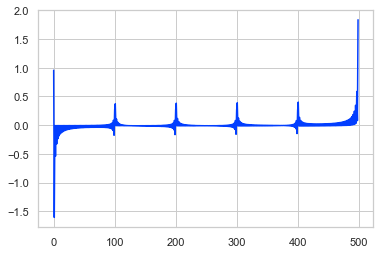

In [108]:
print(_)
plt.plot(t, ceps)

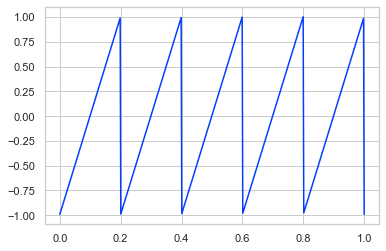

In [109]:
incep = inverse_complex_cepstrum(ceps, np.array(1.0))    # inverse ceps
plt.plot(signal_1['Time'], incep)

In [110]:
distance.euclidean(signal_1["Value"],incep)

0.17888543820000147

# GMM of All

## GMM on Time Series

In [21]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 100)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [22]:
ts = GMM_fit(signal_1)
print(ts, '\n')
print('WEIGHTS -', ts.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', ts.means_, '\n')

GaussianMixture(covariance_type='tied', n_components=24) 

WEIGHTS - [0.04053165 0.03868605 0.06354665 0.03553937 0.05160143 0.04791129
 0.05037002 0.04371354 0.02672575 0.04969845 0.0522138  0.04708319
 0.03742786 0.00621209 0.04501028 0.03671439 0.05250019 0.002
 0.04663625 0.05101793 0.03770368 0.04326712 0.04561555 0.04827348] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 0.08246764 -0.17532357]
 [ 0.93692945  0.36929453]
 [ 0.8330758  -0.66924195]
 [ 0.33821168  0.38211682]
 [ 0.4267793  -0.73220695]
 [ 0.47552914 -0.24470861]
 [ 0.77415565  0.74155647]
 [ 0.37583268  0.75832684]
 [ 0.0471607  -0.52839297]
 [ 0.62679709 -0.73202911]
 [ 0.57295283  0.72952826]
 [ 0.72655116  0.26551164]
 [ 0.30171077  0.01710771]
 [ 0.6516284  -0.48371598]
 [ 0.12550568  0.25505677]
 [ 0.02125178 -0.78748221]
 [ 0.89105912 -0.08940881]
 [ 1.         -1.        ]
 [ 0.67927332 -0.20726682]
 [ 0.17263407  0.72634071]
 [ 0.26413375 -0.35866253]
 [ 0.97520427  0.75204265]
 [ 0.22404268 -0.75957325]
 [

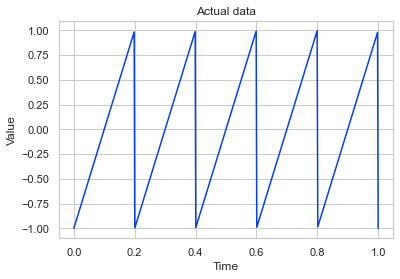

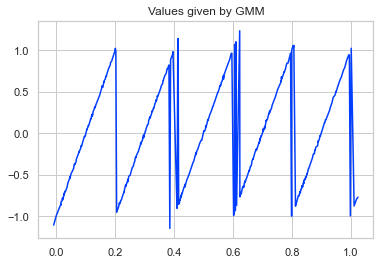

In [23]:
z,_ = ts.sample(500)
plt.title('Actual data')
sns.lineplot(signal_1['Time'], signal_1['Value'])
plt.show()
plt.title('Values given by GMM')
sns.lineplot(z[:,0],z[:,1])
plt.show()

In [24]:
distance.euclidean(signal_1["Value"], z[:, 1])

17.34715409574839

## GMM on Real and Img Freq

In [81]:
freq_ampli1,freq_ampli1i = freq(signal_1)

In [82]:
fr = GMM_fit(freq_ampli1)                        # GMM on real part of FFT data
fi = GMM_fit(freq_ampli1i)                      # GMM on imaginary part of FFT data

In [27]:
print(f, '\n')
print('WEIGHTS -', fr.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',fr.means_, '\n')

GaussianMixture(n_components=30) 

WEIGHTS - [0.01531134 0.03803834 0.02933422 0.01124185 0.0325931  0.04868521
 0.03073468 0.01740432 0.01396868 0.03326346 0.04353187 0.01592258
 0.03258447 0.04247193 0.03821054 0.04076644 0.00199974 0.03901661
 0.11518067 0.03528409 0.03366899 0.02807685 0.04134997 0.08535992
 0.03901054 0.0307562  0.0160192  0.02386493 0.01570461 0.01064465] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[-3.86969844e-01 -3.50830244e+00]
 [ 3.22393829e-01  8.64480859e-01]
 [ 3.08650620e-02 -1.96814802e+00]
 [ 8.90456893e-03 -6.92498485e+00]
 [-4.41175604e-01  1.84976085e+00]
 [-1.44368507e-01 -1.23418100e+00]
 [ 4.50881095e-01  1.89084653e+00]
 [ 1.08140419e-01 -6.54632583e+00]
 [ 4.60061128e-01 -3.08789711e+00]
 [ 7.00744037e-02 -1.81405369e+00]
 [-3.45536021e-01  1.11361324e+00]
 [-4.65164722e-01 -3.07778995e+00]
 [ 4.11325753e-01  1.68267335e+00]
 [ 1.66585096e-01 -1.00557212e+00]
 [-3.96826172e-01  1.57805321e+00]
 [-2.46977664e-01 -5.04555801e+00]
 [-1.40000000e-

In [28]:
print(fi, '\n')
print('WEIGHTS -', fi.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',fi.means_, '\n')

GaussianMixture(n_components=53) 

WEIGHTS - [0.04558519 0.002      0.002      0.002      0.002      0.002
 0.002      0.06377726 0.002      0.002      0.002      0.00789174
 0.002      0.00619757 0.06408839 0.00406586 0.03039792 0.002
 0.002      0.002      0.002      0.01002355 0.04840036 0.002
 0.002      0.00599882 0.002      0.07329938 0.00799234 0.00981458
 0.08157844 0.07328982 0.002      0.002      0.04779301 0.01268645
 0.002      0.05036276 0.04444682 0.002      0.0062553  0.01523179
 0.02030668 0.05139938 0.01559497 0.01002751 0.00199999 0.00358051
 0.05467852 0.04628743 0.002      0.00199998 0.04094769] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[ 2.59611409e-01 -1.97616606e+00]
 [ 2.00000000e-02  7.93813217e+01]
 [-2.00000000e-02 -7.93813217e+01]
 [ 1.00000000e-02  1.59295842e+02]
 [-1.00000000e-02 -1.59295842e+02]
 [ 5.00000000e-02  3.10139876e+01]
 [-5.00000000e-02 -3.10139876e+01]
 [-1.89886912e-01  1.82458625e+00]
 [-9.00000000e-02 -1.61729485e+01]
 [ 8.00000000e-02 

In [29]:
z1,_ = fr.sample(500)
z1i,_ = fi.sample(500)

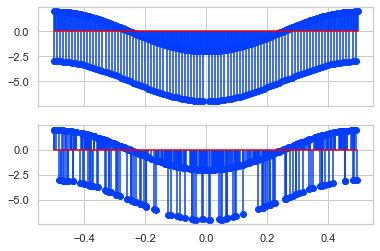

In [30]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#plt.show()
ax[1].stem(z1[:, 0], z1[:, 1])
plt.show()

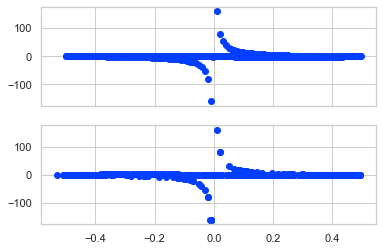

In [31]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
#plt.show()
ax[1].scatter(z1i[:, 0], z1i[:, 1])
plt.show()

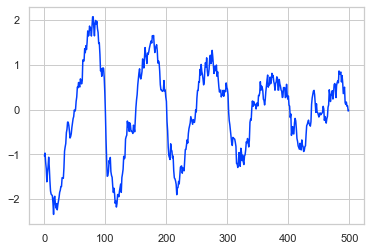

In [32]:
fr_d = pd.DataFrame(zip(z1[:,0],z1[:,1]),columns=['Freq','Ampli'])
fi_d = pd.DataFrame(zip(z1i[:,0],z1i[:,1]),columns=['Freq','Ampli'])
value = idft2(fr_d,fi_d)
plt.plot(value)

In [33]:
distance.euclidean(signal_1["Value"], value)

14.519125617371751

## GMM on Log-Freq

In [34]:
lr = GMM_fit(log1)                        # GMM on real part of FFT data
li = GMM_fit(log1i)

In [35]:
print(lr, '\n')
print('WEIGHTS -', lr.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',lr.means_, '\n')

GaussianMixture(n_components=10) 

WEIGHTS - [0.59011672 0.04237035 0.03979836 0.04411128 0.04785349 0.01072945
 0.04700995 0.06782508 0.06608333 0.044102  ] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[-0.00988628  0.99999591]
 [-0.47344307  1.95308613]
 [ 0.47510101  1.95760505]
 [-0.41945025  1.73033617]
 [ 0.3651292   1.30569096]
 [ 0.45041828  1.        ]
 [-0.36238796  1.28010367]
 [ 0.29253178  0.51175907]
 [-0.29144581  0.49904987]
 [ 0.42259669  1.74911258]] 



In [36]:
print(li, '\n')
print('WEIGHTS -', li.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n',li.means_, '\n')

GaussianMixture(n_components=38) 

WEIGHTS - [0.04739223 0.002      0.002      0.002      0.002      0.002
 0.22760969 0.002      0.002      0.002      0.00441584 0.05163998
 0.002      0.002      0.09176723 0.07759519 0.00831663 0.002
 0.002      0.03936669 0.04883813 0.01793272 0.03546623 0.002
 0.01014113 0.10495265 0.00199995 0.002      0.05723421 0.03902644
 0.01384164 0.00736538 0.01000213 0.002      0.002      0.0371528
 0.00402466 0.03191845] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[-1.80642671e-01  1.78671481e+00]
 [ 2.00000000e-02  7.93813217e+01]
 [ 1.00000000e-02  1.59295842e+02]
 [ 5.00000000e-02  3.10139876e+01]
 [ 1.10000000e-01  1.26410180e+01]
 [ 3.00000000e-02  5.26257133e+01]
 [ 1.12553726e-01  1.00000000e+00]
 [ 7.00000000e-02  2.15619826e+01]
 [ 1.50000000e-01  8.21468397e+00]
 [ 4.00000000e-02  3.91610125e+01]
 [ 1.96464231e-01  5.18233156e+00]
 [-4.73516082e-02  5.00168861e-01]
 [ 9.00000000e-02  1.61729485e+01]
 [ 6.00000000e-02  2.55271957e+01]
 [ 4.370887

In [37]:
z2,_ = lr.sample(500)
z2i,_ = li.sample(500)

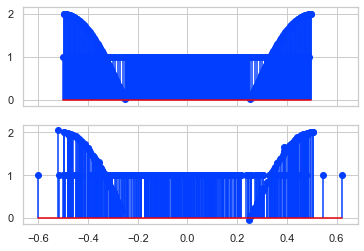

In [38]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].stem(log1['Freq'], log1['Ampli'])
#plt.show()
ax[1].stem(z2[:, 0], z2[:, 1])
plt.show()

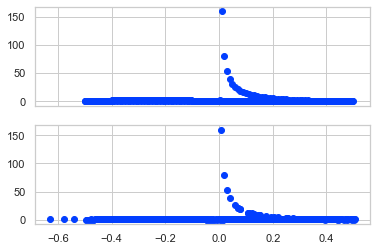

In [39]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].scatter(log1i['Freq'], log1i['Ampli'])
#plt.show()
ax[1].scatter(z2i[:, 0], z2i[:, 1])
plt.show()

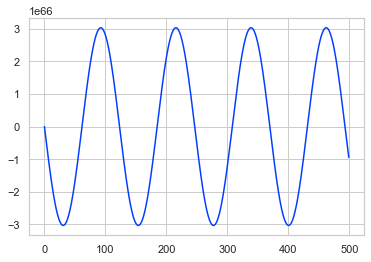

In [40]:
lr_d = pd.DataFrame(zip(z2[:,0],np.exp(z2[:,1])),columns=['Freq','Ampli'])
li_d = pd.DataFrame(zip(z2i[:,0],np.exp(z2i[:,1])),columns=['Freq','Ampli'])
value = idft2(lr_d,li_d)
plt.plot(value)

In [41]:
distance.euclidean(signal_1["Value"],value)

4.763380636470905e+67

## GMM on Cepstrum

In [42]:
c1 = np.array(ceps).reshape(-1, 1)
c = GMM_fit(c1)

In [43]:
print(c, '\n')
print('WEIGHTS -', c.weights_, '\n')
print('MEANS (Col 1: Freq; Col 2: Amplitude) - \n', c.means_, '\n')

GaussianMixture(covariance_type='spherical', n_components=5) 

WEIGHTS - [0.54086424 0.002      0.002      0.07593416 0.37920161] 

MEANS (Col 1: Freq; Col 2: Amplitude) - 
 [[-0.00926593]
 [ 1.83518248]
 [-1.60680289]
 [ 0.08804129]
 [-0.00196253]] 



In [44]:
z3,_ = c.sample(500)

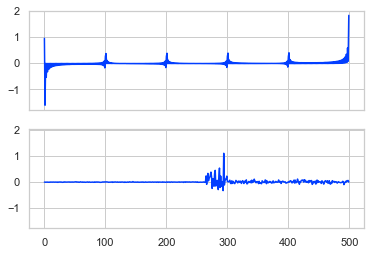

In [45]:
fig, ax = plt.subplots(2, sharex='all', sharey='all')
ax[0].plot(t, ceps)
#plt.show()
ax[1].plot(t, z3.flatten())
plt.show()

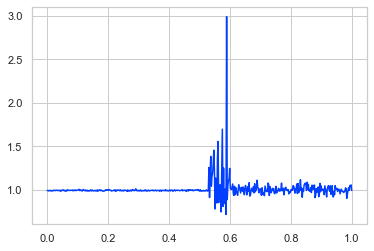

In [46]:
gmm_incep = inverse_complex_cepstrum(z3, np.array(1.0))    # inverse ceps
plt.plot(signal_1['Time'], gmm_incep)

In [47]:
distance.euclidean(signal_1['Value'], gmm_incep)

26.010445970020623